# Zufallszahlen Simulieren

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor dem Präsenzunterricht durchgearbeitet werden.

Das Ziel ist, ein einfaches Verständnis für den Nutzen von Zufallszahlen in der Simulation von stochastischen Prozessen zu erlangen.

## Stochastische Prozesse

Ein stochastischer Prozess ist ein Modell, das die Entwicklung eines Systems oder Phänomens über die Zeit beschreibt. Dabei wird berücksichtigt, dass Zufallseinflüsse eine Rolle spielen können. Im Gegensatz zu deterministischen Prozessen, bei denen der zukünftige Zustand eines Systems eindeutig aus dem aktuellen Zustand bestimmt werden kann, können bei stochastischen Prozessen zufällige Ereignisse auftreten, welche die zukünftige Entwicklung unsicher machen.

Stochastische Prozesse sind in vielen wissenschaftlichen Disziplinen von grosser Bedeutung, wie zum Beispiel in der Physik, Chemie, Biologie, Ökonomie, Informatik und Statistik. Sie werden häufig verwendet, um natürliche Phänomene, wirtschaftliche Entwicklungen oder technische Systeme zu modellieren, bei denen Unsicherheit oder zufällige Fluktuationen eine Rolle spielen. Beispiele für stochastische Prozesse sind der Random Walk, die Brownsche Bewegung, Markow-Ketten, Poisson-Prozesse und Wiener Prozesse.

Markow-Ketten sind wohl die wichtigsten stochastischen Prozesse. Es handelt sich dabei um iterative Prozesse, bei denen der nächste Zustand nur vom aktuellen Zustand abhängt und nicht von den vorherigen Zuständen. Man kann sich das als ein Spiel vorstellen, bei dem man nur abhängig von der aktuellen Spielsituation und nicht von den vorherigen Entscheidungen eine neue Entscheidung trifft. Die Wahrscheinlichkeiten von einem Zustand des Systems in einen anderen Zustand überzugehen, sind konstant und werden in einer sogenannten Übergangsmatrix dargestellt.

Videos:

- ["Markoff Kette, Markov Kette, Übergangsprozess, stochastischer Prozess" - Daniel Jung](https://youtu.be/NKoPwE2LQhc)
- ["Markov Chains Clearly Explained! Part - 1" - Normalized Nerd](https://youtu.be/i3AkTO9HLXo)

Weitere Informationen:

- ["Stochastischer Prozess" - Wikipedia](https://de.wikipedia.org/wiki/Stochastischer_Prozess)
- ["Markov-Kette" - Wikipedia](https://de.wikipedia.org/wiki/Markow-Kette)

## Diffusion

Unter einer Diffusion versteht man in der Physik einen Vorgang, bei dem ein Stoff aufgrund molekularer Bewegung in einen anderen eindringt oder ihn ganz durchdringt. Wir betrachten als Beispiel eines solchen Vorgangs das folgende vereinfachte Modell einer Diffusion:

Ein mit Teilchen gefüllter Kasten ist durch eine durchlässige Wand in zwei Hälften A und B geteilt. Die Verteilung der Teilchen auf die beiden Hälften ändert sich jeweils nach Ablauf einer festen Zeiteinheit: 10 % der sich in A befindlichen Teilchen gelangen nach B (die restlichen 90 % bleiben in A) und 20 % der sich in B befindlichen Teilchen gelangen nach A (die restlichen 80 % bleiben in B). 

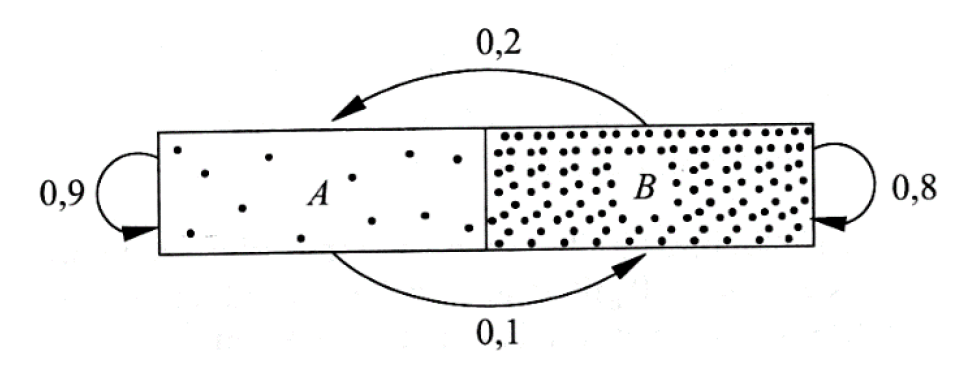

Das Modell ist ein Markow-Prozess, da der Übergang von einem Zustand in den nächsten nur vom aktuellen Zustand (Teilchen in A oder B) abhängt und nicht von den vorherigen Zuständen. 

Videos:

- ["Stochastische Prozesse, Übergangsgraph, Übergangsdiagramm, Zustände" - Fit im Mathe-Abi"](https://www.youtube.com/watch?v=DsnMqNZRxgM)
- ["Markoff Kette, Markov Kette, Übergangsprozess, stochastischer Prozess" - Mathe by Daniel Jung](https://www.youtube.com/watch?v=NKoPwE2LQhc)
- ["Introducing Markov Chains" - Harvard Online](https://www.youtube.com/watch?v=JHwyHIz6a8A)
- ["Intro to Markov Chains & Transition Diagrams" - Dr. Trefor Bazett](https://www.youtube.com/watch?v=rHdX3ANxofs)

## Arbeitsauftrag

### Aufgabe 1: Vorbereitungen

#### a) Einführung `np.choice`

Bevor wir direkt mit der Implementierung mit der Diffusion beginnen, kommt hier eine kleine Einführung in die Funktion [`np.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html). Hierfür wird das folgende Beispiel verwendet:

Wir werfen eine unfaire Münze, welche zu 60 % Kopf und zu 40 % Zahl zeigt. Schreibe hierfür eine Funktion `toss_coin(rng, n)`, welche das Ergebnis von `n` Münzwürfen zurückgibt. Als Argument nimmt sie einen NumPy Random Generator `rng`. Benutze hierfür die Funktion [`rng.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html).

Test deine Funktion, indem du 5 Würfe simulierst. Mit dem Default Random Generator und dem Seed 42 sollte das Ergebnis `["Zahl", "Kopf", "Zahl", "Zahl", "Kopf"]` sein.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

rng = np.random.default_rng(42)


In [2]:
# Die möglichen Ergebnisse eines Münzwurfs
outcomes = ["Kopf", "Zahl"]

# Die Wahrscheinlichkeiten für die beiden Ergebnisse
probabilities = [0.6, 0.4]


def toss_coin(rng, n):
    return rng.choice(outcomes, p=probabilities, size=n)


# Führen Sie 5 Münzwürfe durch
for i, res in enumerate(toss_coin(rng, 5)):
    print(f"Münzwurf {i + 1}: {res}")


Münzwurf 1: Zahl
Münzwurf 2: Kopf
Münzwurf 3: Zahl
Münzwurf 4: Zahl
Münzwurf 5: Kopf


#### b) Einführung `Counter` und `plt.bar`

[Counter](https://docs.python.org/3/library/collections.html#collections.Counter) ist eine praktische Python-Klasse aus dem `collections`-Modul, die das Zählen von Elementen in iterierbaren Sammlungen wie Listen oder Tupeln erleichtert. Es erstellt ein Wörterbuch, das Elemente als Schlüssel und ihre Häufigkeiten als Werte speichert, und ermöglicht eine einfache Erstellung von Histogrammen und Häufigkeitsverteilungen.

[plt.bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) ist eine Funktion aus der matplotlib.pyplot-Bibliothek, die zur Erstellung von Balkendiagrammen dient. Diese Diagramme sind nützlich, um kategorische Daten oder diskrete Datenverteilungen zu visualisieren. Mit `plt.bar()` können Sie die Balkenhöhe basierend auf den Häufigkeiten der Elemente in einer Sammlung darstellen.

Führe 1000 Münzwürfe mit der Funktion `toss_coin` aus Aufgabe 1a) durch und speichere das Ergebnis in einer Variablen `coins`. Erstelle mit `Counter` eine Variable `counts` welche die Anzahl an Kopf und Zahl würfen wiedergibt. Stelle die relative Häufigkeit der Kopf- und Zahlwürfe mit `plt.bar` dar.

In [3]:
n = 1000
coins = toss_coin(rng, n)
counts = Counter(coins)
counts


Counter({'Zahl': 395, 'Kopf': 605})

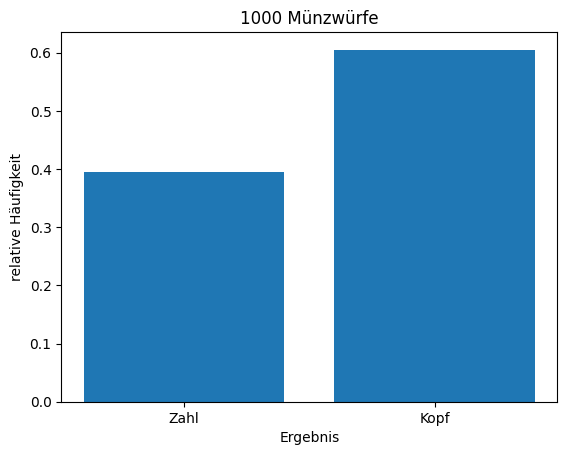

In [4]:
frequencies = np.array(list(counts.values())) / n

plt.bar(counts.keys(), frequencies)
plt.xlabel("Ergebnis")
plt.ylabel("relative Häufigkeit")
plt.title(f"{n} Münzwürfe")
plt.show()


### Aufgabe 2: Implementierung der Diffusion

Wir implementieren eine einfache Version des Diffusionsmodells.

#### a) Implementierung Schritt 1

Programmiere zuerst eine Funktion namens `markov_next(x, rng)`, die den aktuellen Zustand `x` eines Teilchens und einen Random Generator `rng` als Parameter nimmt. Die Funktion soll den nächsten Zustand zurückgeben. Die Übergangswahrscheinlichkeiten sind $p_{AB} = 0.1$ und $p_{BA} = 0.2$. Benutze hierfür die Funktion `rng.choice()`.

Verwende `A = 0` und `B = 1` für die möglichen Zustände, anstatt mit den Strings `"A"` und `"B"` zu arbeiten.

Test die Funktion mit dem Anfangszustand `x = A` und dem Seed 12345678. Das Ergebnis sollte `1` sein (also Zustand B).

In [5]:
A, B = 0, 1
p_AB = 0.1
p_BA = 0.2


def markov_next(x, rng):
    if x == A:
        return rng.choice((A, B), p=(1 - p_AB, p_AB))
    else:
        return rng.choice((A, B), p=(p_BA, 1 - p_BA))


rng = np.random.default_rng(12345678)
markov_next(A, rng)


1

#### b) Implementierung des gesamten Prozesses

Nun schreibst du eine Funktion `markov_process(x, rng, n)`, die einen Startwert `x`, den Random Generator `rng` und eine Anzahl Schritte `n` als Parameter nimmt. Sie soll `markov_next()` benutzen, um ausgehend vom Startwert eine Liste von `n` Schritten in der Markov-Kette zu erzeugen. Die Funktion soll den Verlauf der Zustände inkl. des Anfangszustandes als Array zurückgeben.

In [6]:
def markov_process(x, rng, n):
    xs = [x]
    for i in range(n):
        x = markov_next(x, rng)
        xs.append(x)
    return np.array(xs)


#### c) Testen der Funktion

Teste die Funktion `markov_process()` mit dem Startwert `x = A`, dem Seed 12345678 und `n = 10`.

Das Resultat sollte so aussehen: `[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]`.

In [7]:
rng = np.random.default_rng(12345678)
markov_process(A, rng, 10)


array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

#### d) Stemplot


Um sich einen Überlbick über die zeitliche Veränderung in der Markov-Kette zu machen, plotten wir nun die Zustände in Abhängigkeit der Zeit. Hierfür verwenden wir die Funktion [`plt.stem`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html). Wir nehmen den gleichen Seed und Startwert wie in Aufgabe 2c), jedoch erhöhen wir die Anzahl Schritte auf `n = 30`.

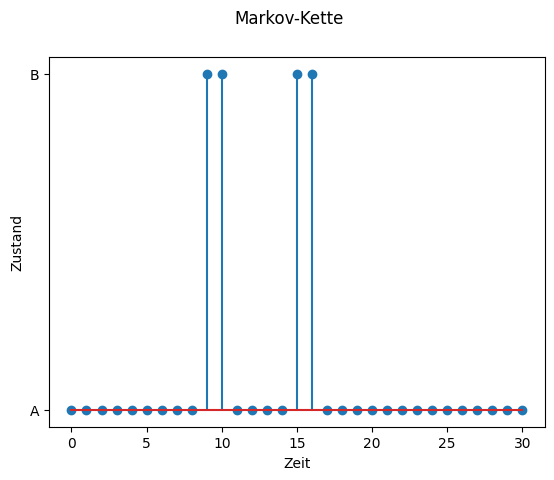

In [14]:
fig, ax = plt.subplots()
ax.stem(markov_process(A, rng, 30))
ax.set_xlabel("Zeit")
ax.set_ylabel("Zustand")
ax.set_yticks((0, 1))
ax.set_yticklabels(("A", "B"))
plt.suptitle("Markov-Kette")
plt.show()


#### e) Barplot

Erzeuge nun eine Markov-Kette mit `n = 1000` Schritten und dem Seed 12345678.

Zähle die Zustände mit dem `Counter()` und gib das Resultat aus.

Erstelle daraus einen Barplot der relativen Häufigkeit. Verwende dazu die Funktion [`plt.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

- [Matplotlib Bar Chart](https://pythonbasics.org/matplotlib-bar-chart/)

Was fällt dir auf? Beschreiben die Verteilung der Zustände.

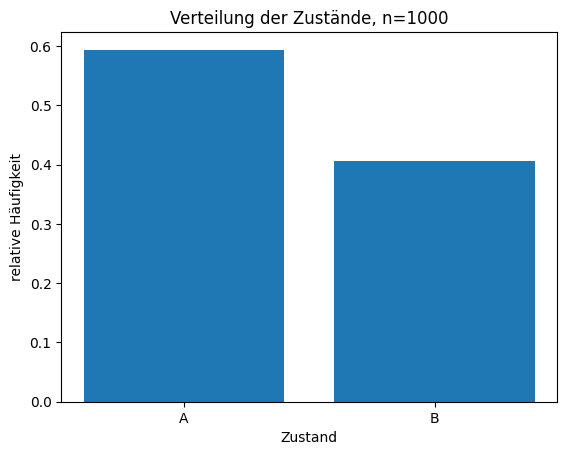

In [15]:
n = 1000
y = markov_process(A, rng, n)

counts = Counter(y)
frequencies = np.array(list(counts.values())) / n

plt.bar(x=["A", "B"], height=frequencies)
plt.xlabel("Zustand")
plt.ylabel("relative Häufigkeit")
plt.title(f"Verteilung der Zustände, n={n}")
plt.show()
